# DAT-NYC-37 | Codealong 11| Advanced Metrics and Communicating Results

In [16]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from sklearn.neighbors import KNeighborsClassifier

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

## `Iris` dataset, Take 3

In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'iris.csv'))

In [32]:
X = df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]

ys = pd.get_dummies(df.Species, prefix = None)

y_true_Setosa = ys.Setosa
y_true_Versicolor = ys.Versicolor
y_true_Virginica = ys.Virginica

model = KNeighborsClassifier(n_neighbors=2)
model.fit(X, y_true_Setosa)

y_hat_Setosa = model.predict(X)
y_hat_Versicolor = model.predict(X)
y_hat_Virginica = model.predict(X)

In [33]:
print "Setosa     classifier's score =", model.score(X, y_true_Setosa)
print "Versicolor classifier's score =", model.score(X, y_true_Versicolor)
print "Virginica  classifier's score =", model.score(X, y_true_Virginica)

Setosa     classifier's score = 1.0
Versicolor classifier's score = 0.333333333333
Virginica  classifier's score = 0.333333333333


## Part A - ROC/AUC

### Setosa's ROC

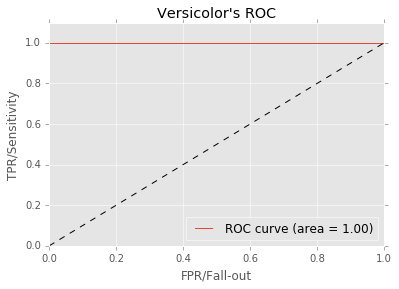

In [27]:
fpr, tpr, thresholds = metrics.roc_curve(y_true_Setosa, y_hat_Setosa)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([.0, 1.])
plt.ylim([.0, 1.1])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title("Versicolor's ROC")
plt.legend(loc = 'lower right')
plt.show()

### Setosa's AUC

In [28]:
metrics.roc_auc_score(y_true_Setosa, y_hat_Setosa)

1.0

### Versicilor's ROC

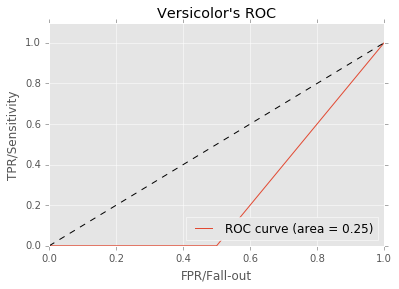

In [30]:
fpr, tpr, thresholds = metrics.roc_curve(y_true_Versicolor, y_hat_Versicolor)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([.0, 1.])
plt.ylim([.0, 1.1])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title("Versicolor's ROC")
plt.legend(loc = 'lower right')
plt.show()

### Versicilor's ROC

In [31]:
metrics.roc_auc_score(y_true_Versicolor, y_hat_Versicolor)

0.25

### Virginica's ROC

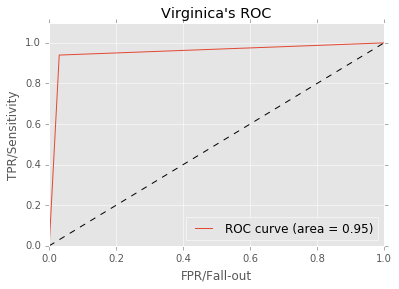

In [23]:
fpr, tpr, thresholds = metrics.roc_curve(y_true_Virginica, y_hat_Virginica)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([.0, 1.])
plt.ylim([.0, 1.1])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title("Virginica's ROC")
plt.legend(loc = 'lower right')
plt.show()

### Virginica's ROC

In [12]:
metrics.roc_auc_score(y_true_Virginica, y_hat_Virginica)

0.98499999999999999

## Part B - Prettying up Graphs

In [13]:
color = df.Species.map(pd.Series({'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'}))

(0.0, 5.0)

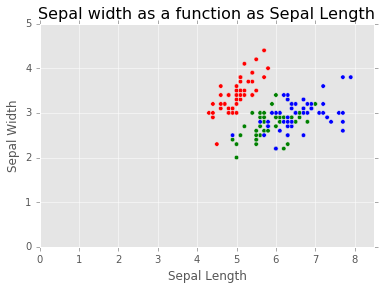

In [14]:
axes = df.plot('SepalLength', 'SepalWidth', kind = 'scatter', c = color)
axes.set_title('Sepal width as a function as Sepal Length', fontsize = 16)

axes.set_xlabel('Sepal Length')
axes.set_xlim(.0)

axes.set_ylabel('Sepal Width')
axes.set_ylim(.0)

(0.0, 5.0)

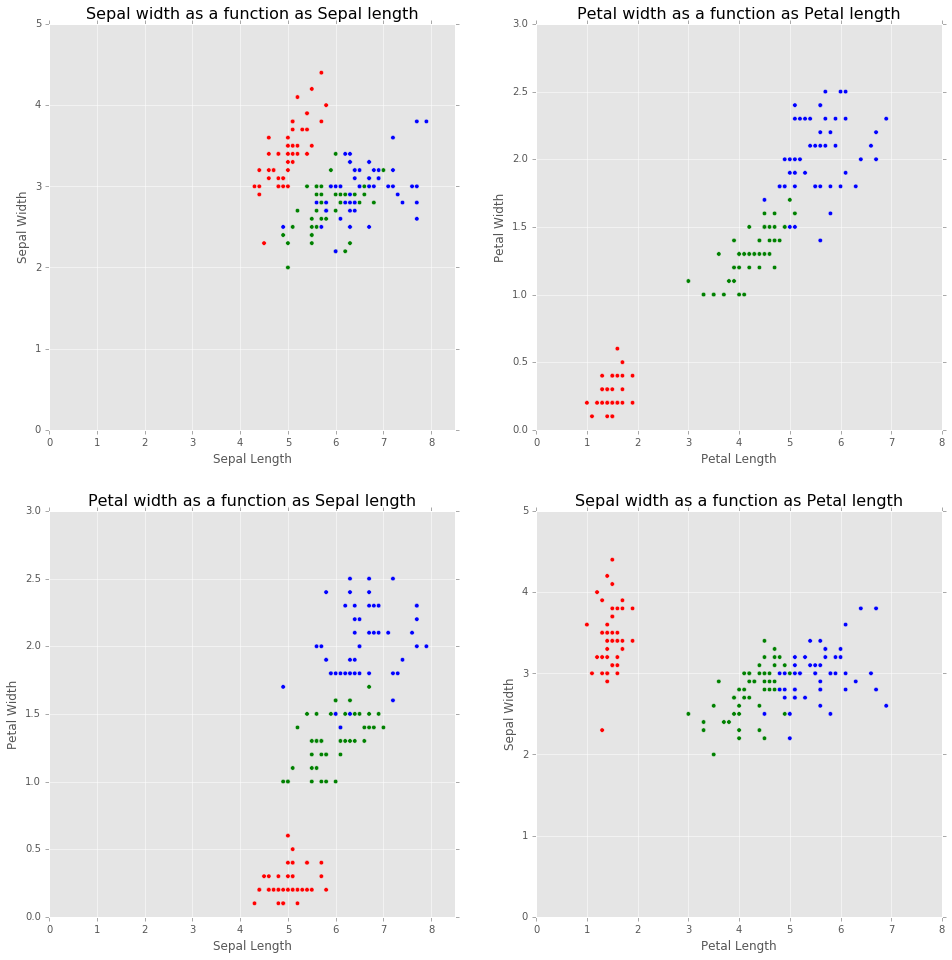

In [15]:
figure, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 16))

df.plot('SepalLength', 'SepalWidth', kind = 'scatter', c = color, ax = axes[0, 0])
axes[0, 0].set_title('Sepal width as a function as Sepal length', fontsize = 16)
axes[0, 0].set_xlabel('Sepal Length')
axes[0, 0].set_xlim(.0)
axes[0, 0].set_ylabel('Sepal Width')
axes[0, 0].set_ylim(.0)

df.plot('PetalLength', 'PetalWidth', kind = 'scatter', c = color, ax = axes[0, 1])
axes[0, 1].set_title('Petal width as a function as Petal length', fontsize = 16)
axes[0, 1].set_xlabel('Petal Length')
axes[0, 1].set_xlim(.0)
axes[0, 1].set_ylabel('Petal Width')
axes[0, 1].set_ylim(.0)

df.plot('SepalLength', 'PetalWidth', kind = 'scatter', c = color, ax = axes[1, 0])
axes[1, 0].set_title('Petal width as a function as Sepal length', fontsize = 16)
axes[1, 0].set_xlabel('Sepal Length')
axes[1, 0].set_xlim(.0)
axes[1, 0].set_ylabel('Petal Width')
axes[1, 0].set_ylim(.0)

df.plot('PetalLength', 'SepalWidth', kind = 'scatter', c = color, ax = axes[1, 1])
axes[1, 1].set_title('Sepal width as a function as Petal length', fontsize = 16)
axes[1, 1].set_xlabel('Petal Length')
axes[1, 1].set_xlim(.0)
axes[1, 1].set_ylabel('Sepal Width')
axes[1, 1].set_ylim(.0)